In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))


In [2]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from outliers import detect_outliers_iqr, detect_outliers_zscore, winsorize

raw = os.path.abspath(os.path.join(os.getcwd(),"..","data","raw","sample_raw.csv"))
df = pd.read_csv(raw)

target = "value_b"
df["out_iqr"] = detect_outliers_iqr(df[target])
df["out_z"] = detect_outliers_zscore(df[target])
df["wins_"+target] = winsorize(df[target])

base = df[target]
filtered = df.loc[~df["out_iqr"], target]
winsed = df["wins_"+target]

summary = pd.DataFrame({
    "n":[base.size, filtered.size, winsed.size],
    "mean":[base.mean(), filtered.mean(), winsed.mean()],
    "median":[base.median(), filtered.median(), winsed.median()],
    "std":[base.std(), filtered.std(), winsed.std()]
}, index=["all","filtered_iqr","winsor_5_95"]).round(3)
summary


,n,mean,median,std
all,20,105.750,105.0,59.389
filtered_iqr,20,105.750,105.0,59.389
winsor_5_95,20,105.988,105.0,58.224


C:\Users\24614\AppData\Local\Temp\ipykernel_32532\3504055931.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.figure(); plt.boxplot([base, filtered, winsed], labels=["all","filtered_iqr","winsor_5_95"]); plt.show()


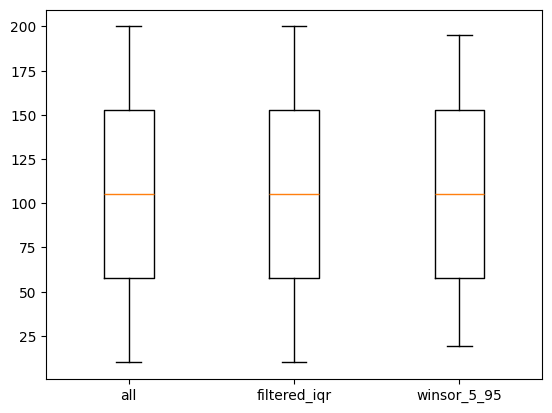

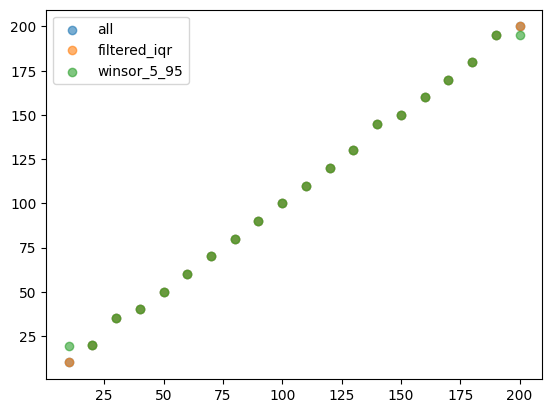

In [3]:
plt.figure(); plt.boxplot([base, filtered, winsed], labels=["all","filtered_iqr","winsor_5_95"]); plt.show()
plt.figure(); 
plt.scatter(df["value_a"], df[target], alpha=0.6, label="all")
plt.scatter(df.loc[~df["out_iqr"], "value_a"], df.loc[~df["out_iqr"], target], alpha=0.6, label="filtered_iqr")
plt.scatter(df["value_a"], df["wins_"+target], alpha=0.6, label="winsor_5_95")
plt.legend(); plt.show()


## Reflection
- Methods and thresholds.
- Observed effects on stats and visuals.
- Assumptions and risks; mitigation ideas.
